In [30]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
from matplotlib.colors import ListedColormap  # Colormap utilities

# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler  # Preprocessing tools
from sklearn import model_selection, metrics, preprocessing  # Model selection, evaluation, and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  # Model selection and evaluation
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier


# Statistical analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance inflation factor
from scipy.stats import pointbiserialr, chi2_contingency, spearmanr, entropy  # Statistical functions
from statsmodels.graphics.gofplots import qqplot  # Q-Q plot
from collections import Counter  # Container datatypes

# Tabulate
from tabulate import tabulate  # Pretty-print tabular data

# Set visualization style
#sns.set()  # Set Seaborn default style
#plt.style.use('ggplot')  # Set ggplot style for matplotlib



In [31]:
import gdown
import pandas as pd

# New file ID from the provided Google Drive link
file_id = '17thBJ-2U4qBcSaEYsycjfkzHownIH42C'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output_file = 'dataset.csv'
gdown.download(url, output=output_file, quiet=False)

# Read the downloaded CSV file into a pandas DataFrame
data = pd.read_csv(output_file)

# Display the first few rows of the dataframe
print(data.head())


Downloading...
From: https://drive.google.com/uc?id=17thBJ-2U4qBcSaEYsycjfkzHownIH42C
To: /content/dataset.csv
100%|██████████| 163k/163k [00:00<00:00, 46.9MB/s]

   Survey_id  Ville_id  sex  Age  Married  Number_children  education_level  \
0        926        91    1   28        1                4               10   
1        747        57    1   23        1                3                8   
2       1190       115    1   22        1                3                9   
3       1065        97    1   27        1                2               10   
4        806        42    0   59        0                4               10   

   total_members  gained_asset  durable_asset  ...  incoming_salary  \
0              5      28912201       22861940  ...                0   
1              5      28912201       22861940  ...                0   
2              5      28912201       22861940  ...                0   
3              4      52667108       19698904  ...                0   
4              6      82606287       17352654  ...                1   

   incoming_own_farm  incoming_business  incoming_no_business  \
0                  0             

In [32]:
df=data

In [33]:
# Missing
df.isnull().sum()

,0
Survey_id,0
Ville_id,0
sex,0
Age,0
Married,0
Number_children,0
education_level,0
total_members,0
gained_asset,0
durable_asset,0


In [34]:
df.columns

Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [35]:
df.drop("Survey_id",axis=1,inplace=True)

In [36]:
df.dtypes

,0
Ville_id,int64
sex,int64
Age,int64
Married,int64
Number_children,int64
education_level,int64
total_members,int64
gained_asset,int64
durable_asset,int64
save_asset,int64


In [37]:
df.shape

(1409, 22)

In [38]:
for i in df.columns:
    print(i,df[i].nunique())

Ville_id 255
sex 2
Age 69
Married 2
Number_children 12
education_level 18
total_members 12
gained_asset 440
durable_asset 584
save_asset 266
living_expenses 408
other_expenses 608
incoming_salary 2
incoming_own_farm 2
incoming_business 2
incoming_no_business 2
incoming_agricultural 330
farm_expenses 694
labor_primary 2
lasting_investment 965
no_lasting_investmen 939
depressed 2


In [39]:
for i in df.columns:
    print(i,df[i].unique())




Ville_id [ 91  57 115  97  42  25 130  72 195  33  52  93 232  92 100  54 102  15
 267  22 207 198   9 164  50  69 281  86 108  31  20 135  27  23   5  49
 101  30  21  76 176  18  11  55   1   8  81  19  35  94  89 114  44 125
  71   7  63  48  80 204  14 233  37  17 138 251  60 144  78  26  85  99
  83   6  64 287 167 206  28 141 159 256 179  84 129 168  90 231  66  39
 228  32  13 181  24  43 161 217 116  87   2 173  56  95  46  70  79 172
 127 241  10  53  41  98 260 133 237 104 113 134  16 120 145 264  61 234
  75   3  29  77 160 154 227 210 221 153  67  74 136  73 258 205  12   4
 242 285 112 174 236 201  88 119 215  59 107 106 230  38 220 103  47 202
 193 283  51 137 142 208 184 187 148 118 171 269  68 263 192 121  65 111
 266 149 189 219  34 169 117 246 190 150  45 254 126 105 188 151 143  82
 131 132  36 109 186 211 146 203 218 163 123 185 278 262 255 214 229  96
 124 209  40 157 249 177 162 156 252 175 180 290 158  62 292 275 182 244
 222 239 200 257 216 265 152 279 166 199 1

In [40]:
df

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,91,1,28,1,4,10,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,57,1,23,1,3,8,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,115,1,22,1,3,9,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,97,1,27,1,2,10,4,52667108,19698904,49647648,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,42,0,59,0,4,10,6,82606287,17352654,23399979,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,22,1,25,1,1,7,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1405,69,1,28,1,4,10,6,15711078,24023054,15506558,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1406,184,1,66,0,0,1,1,42440731,22861940,22562605,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1407,75,1,51,1,1,12,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [41]:
# catergoricalvars in df is ille_id,sex ,Married ,education_level ,incoming_salary ,incoming_own_farm ,incoming_business ,incoming_no_business ,labor_primary ,depressed



In [42]:
# List of categorical variables
categorical_vars = ['Ville_id', 'sex', 'Married', 'education_level',
                    'incoming_salary', 'incoming_own_farm', 'incoming_business',
                    'incoming_no_business', 'labor_primary', 'depressed']

# Selecting only numerical variables by excluding the categorical ones
numerical_vars = df.columns.difference(categorical_vars)
numerical_data = df[numerical_vars]
categorical_data=df[categorical_vars]
# Display the first few rows of the numerical data
print(numerical_data.head())
print(categorical_data.head())

   Age  Number_children  durable_asset  farm_expenses  gained_asset  \
0   28                4       22861940       31363432      28912201   
1   23                3       22861940       31363432      28912201   
2   22                3       22861940       31363432      28912201   
3   27                2       19698904       18751329      52667108   
4   59                4       17352654       20731006      82606287   

   incoming_agricultural  lasting_investment  living_expenses  \
0               30028818            28411718         26692283   
1               30028818            28411718         26692283   
2               30028818            28411718         26692283   
3               22288055             7781123           397715   
4               53384566            20100562         80877619   

   no_lasting_investmen  other_expenses  save_asset  total_members  
0            28292707.0        28203066    23399979              5  
1            28292707.0        28203066    2

In [43]:
X=df.drop("depressed",axis=1)
y=df["depressed"]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=1)

In [45]:
# MUltivariate Outlies
Xe_train=X_train

In [46]:
from sklearn.ensemble import IsolationForest
iso_forest =IsolationForest(contamination="auto",random_state=42)
 # Fit the model
iso_forest.fit(Xe_train)
 # Predict outliers (1 for inliers,-1 foroutliers)
y_pred =iso_forest.predict(Xe_train)
 # Calculate the percentage ofoutliers
outlier_percentage = (y_pred==-1).sum() / len(y_pred) * 100
print(f'Percentage of outliers:{outlier_percentage:.2f}%')

Percentage of outliers:29.99%


In [47]:
# outliers univaiate
for i in numerical_vars:
    print(i)
    q1 = numerical_data[i].quantile(0.25)
    q3 = numerical_data[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = numerical_data[(numerical_data[i] < lower_bound) | (numerical_data[i] > upper_bound)]
    #number of outliers in each column
    print(len(outliers))
    print(outliers.shape)
    print(" ")






Age
46
(46, 12)
 
Number_children
22
(22, 12)
 
durable_asset
291
(291, 12)
 
farm_expenses
97
(97, 12)
 
gained_asset
205
(205, 12)
 
incoming_agricultural
159
(159, 12)
 
lasting_investment
126
(126, 12)
 
living_expenses
164
(164, 12)
 
no_lasting_investmen
114
(114, 12)
 
other_expenses
136
(136, 12)
 
save_asset
464
(464, 12)
 
total_members
31
(31, 12)
 


In [48]:
df.shape

(1409, 22)

In [49]:
len(numerical_vars)

12

In [50]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Example dataset: Xe_train
# Setting contamination to 0.05
iso_forest_05 = IsolationForest(contamination=0.05, random_state=42)
iso_forest_05.fit(Xe_train)
y_pred_05 = iso_forest_05.predict(Xe_train)

# Setting contamination to 0.1
iso_forest_10 = IsolationForest(contamination=0.1, random_state=42)
iso_forest_10.fit(Xe_train)
y_pred_10 = iso_forest_10.predict(Xe_train)


In [ ]:
# Calculate percentages of outliers
outlier_percentage_05 = (y_pred_05 == -1).sum() / len(y_pred_05) * 100
outlier_percentage_10 = (y_pred_10 == -1).sum() / len(y_pred_10) * 100

print(f'Percentage of outliers with contamination=0.05: {outlier_percentage_05:.2f}%')
print(f'Percentage of outliers with contamination=0.1: {outlier_percentage_10:.2f}%')


Percentage of outliers with contamination=0.05: 5.06%
Percentage of outliers with contamination=0.1: 10.03%


In [ ]:
# Extracting outliers
outliers_05 = Xe_train[y_pred_05 == -1]
outliers_10 = Xe_train[y_pred_10 == -1]

print("Outliers with contamination=0.05:\n", outliers_05)
print("Outliers with contamination=0.1:\n", outliers_10)


Outliers with contamination=0.05:
       Ville_id  sex  Age  Married  Number_children  education_level  \
1308       146    1   60        0                0                5   
534         10    0   51        0                2               14   
669         69    1   46        0                0               12   
200        173    1   76        0                5                1   
711          8    1   65        0                1                1   
1108        29    1   26        1                5               10   
1226       132    1   30        0                4                7   
521         45    1   73        0                0                1   
1313        49    0   70        0                0                4   
1139       187    1   79        1                0               12   
927        160    0   45        0                2               14   
441         28    0   35        1                0                7   
594        125    0   81        0         

Percentage of outliers with contamination=0.05: 5.06%
Percentage of outliers with contamination=0.1: 10.03%


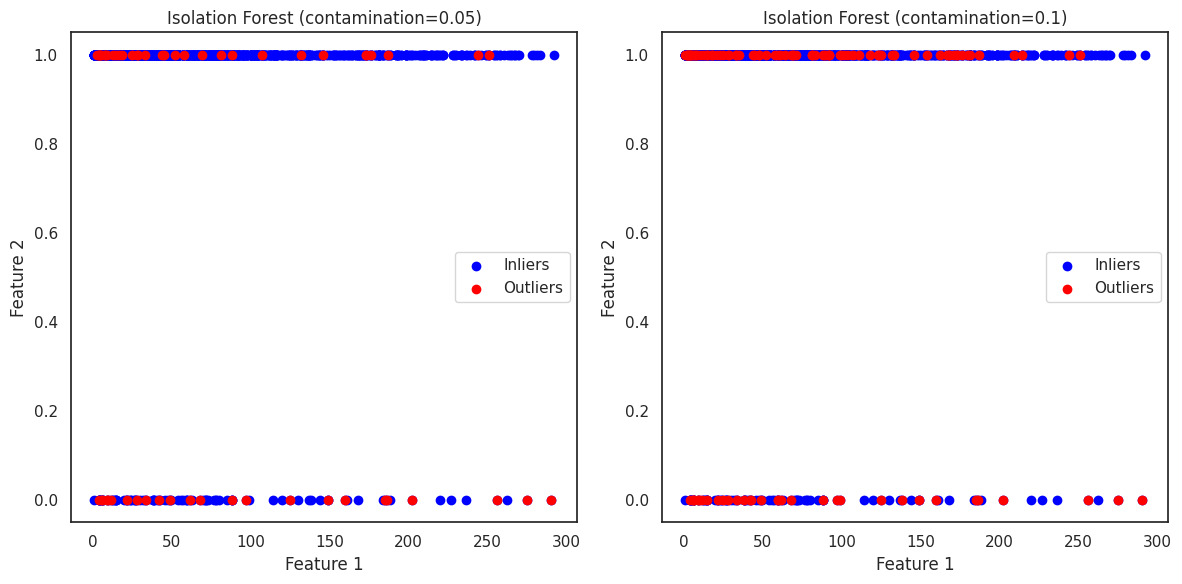

In [ ]:
# Assuming Xe_train is a Pandas DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Example of creating a DataFrame
# Xe_train = pd.DataFrame(...)

# Run Isolation Forest with different contamination settings
iso_forest_05 = IsolationForest(contamination=0.05, random_state=42)
iso_forest_05.fit(Xe_train)
y_pred_05 = iso_forest_05.predict(Xe_train)

iso_forest_10 = IsolationForest(contamination=0.1, random_state=42)
iso_forest_10.fit(Xe_train)
y_pred_10 = iso_forest_10.predict(Xe_train)

# Extracting outliers
outliers_05 = Xe_train[y_pred_05 == -1]
outliers_10 = Xe_train[y_pred_10 == -1]

# Calculate percentages of outliers
outlier_percentage_05 = (y_pred_05 == -1).sum() / len(y_pred_05) * 100
outlier_percentage_10 = (y_pred_10 == -1).sum() / len(y_pred_10) * 100

print(f'Percentage of outliers with contamination=0.05: {outlier_percentage_05:.2f}%')
print(f'Percentage of outliers with contamination=0.1: {outlier_percentage_10:.2f}%')

# Visualizing the outliers
plt.figure(figsize=(12, 6))

# Scatter plot for contamination=0.05
plt.subplot(1, 2, 1)
plt.scatter(Xe_train.iloc[:, 0], Xe_train.iloc[:, 1], color='blue', label='Inliers')
plt.scatter(outliers_05.iloc[:, 0], outliers_05.iloc[:, 1], color='red', label='Outliers')
plt.title('Isolation Forest (contamination=0.05)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Scatter plot for contamination=0.1
plt.subplot(1, 2, 2)
plt.scatter(Xe_train.iloc[:, 0], Xe_train.iloc[:, 1], color='blue', label='Inliers')
plt.scatter(outliers_10.iloc[:, 0], outliers_10.iloc[:, 1], color='red', label='Outliers')
plt.title('Isolation Forest (contamination=0.1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
sns.pairplot(df, diag_kind='kde', kind='reg',plot_kws={'line_kws':{'color':'red'}})

Output hidden; open in https://colab.research.google.com to view.

Age


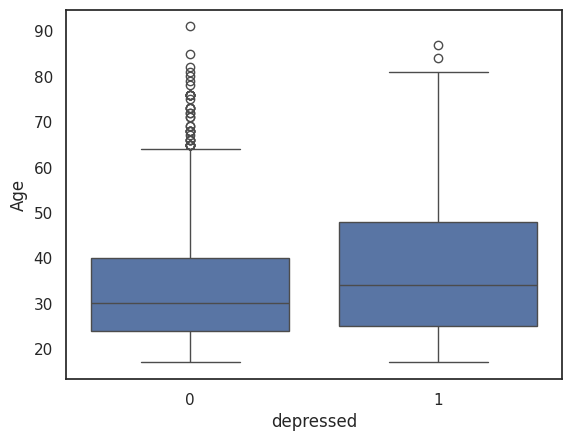

Number_children


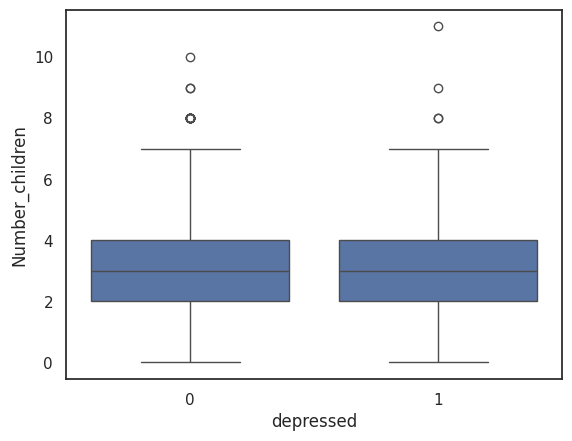

durable_asset


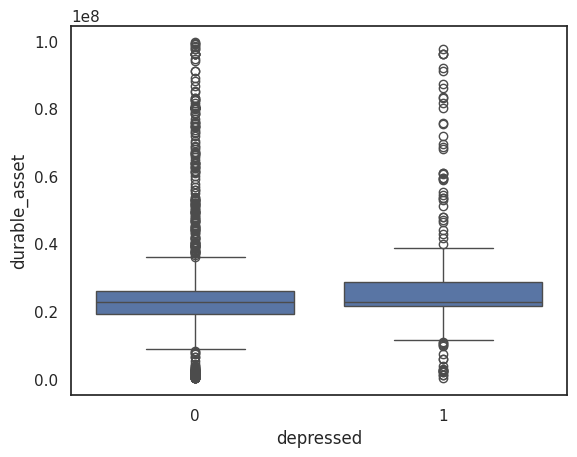

farm_expenses


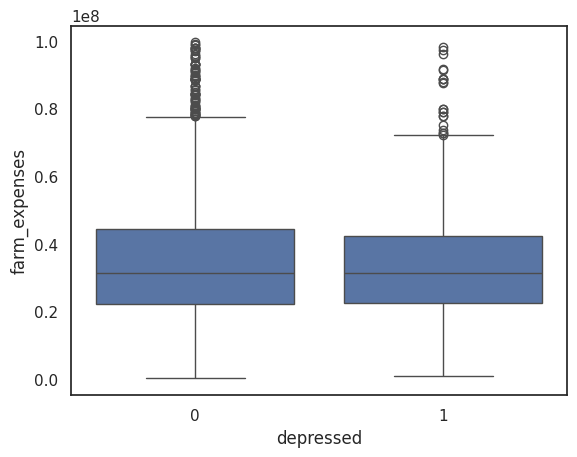

gained_asset


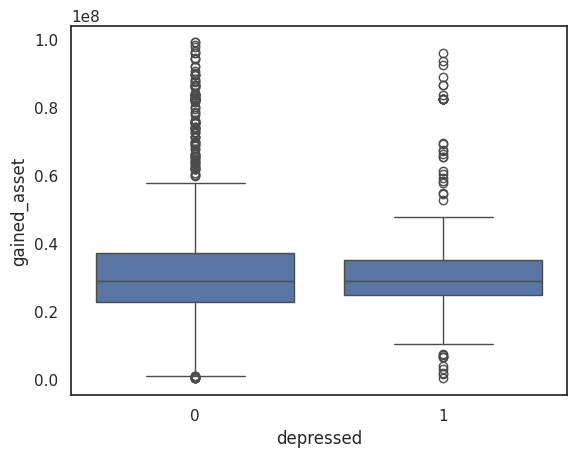

incoming_agricultural


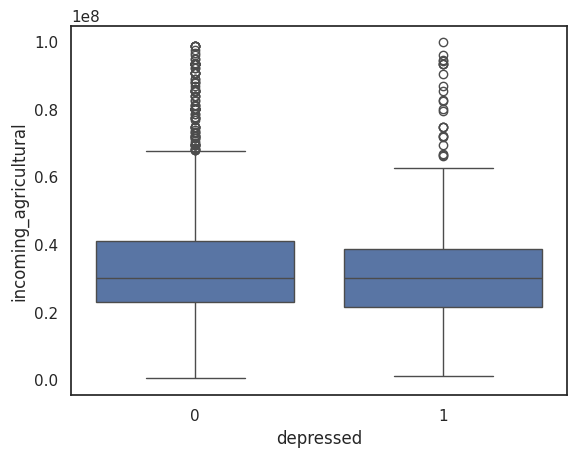

lasting_investment


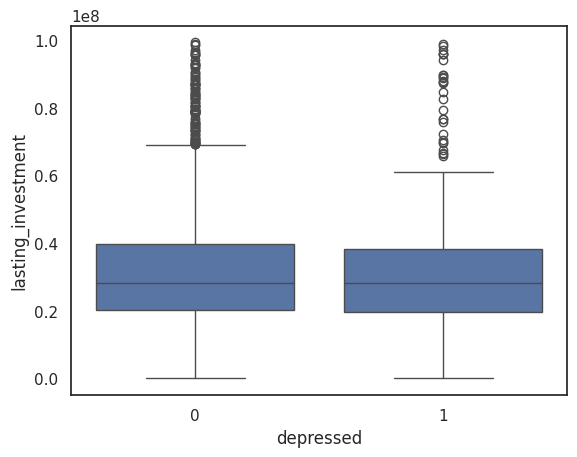

living_expenses


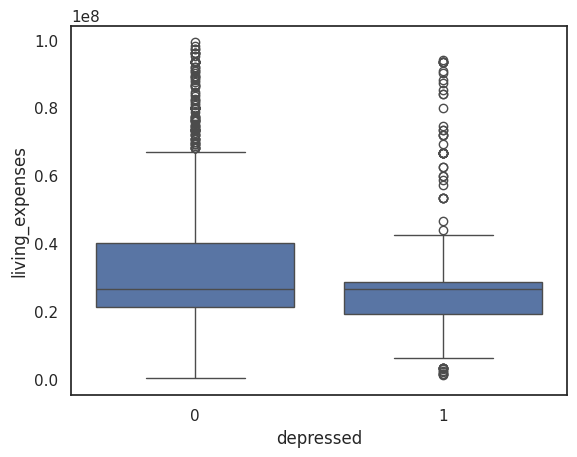

no_lasting_investmen


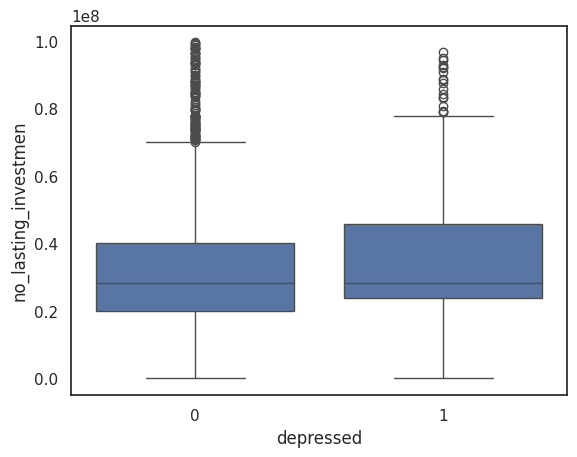

other_expenses


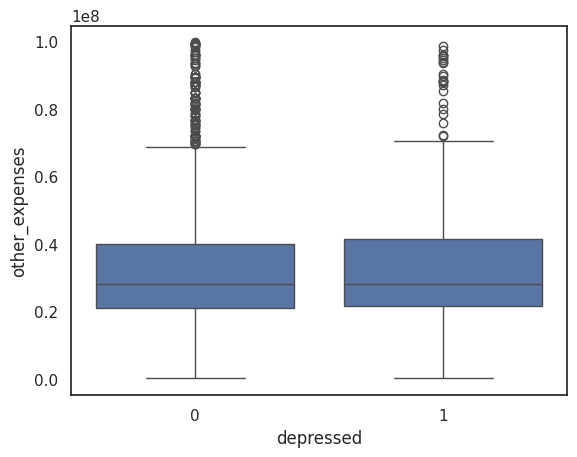

save_asset


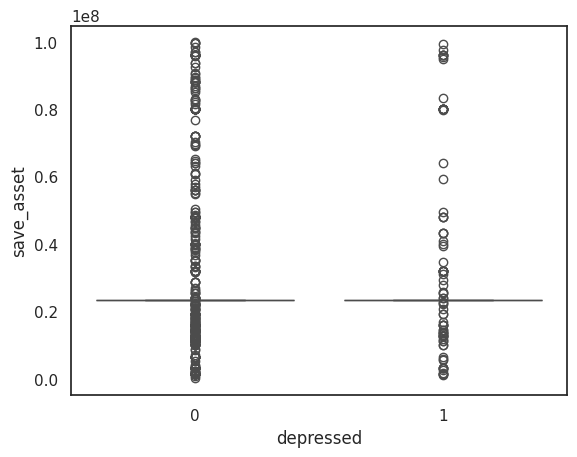

total_members


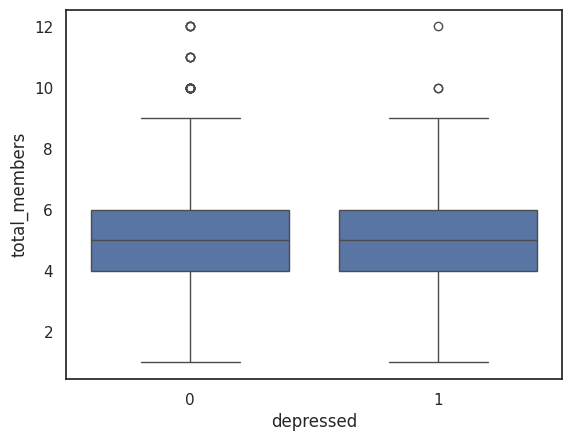

In [ ]:
for i in numerical_vars:
    print(i)
    sns.boxplot(x=y, y=df[i], data=df)
    plt.show()


total_members


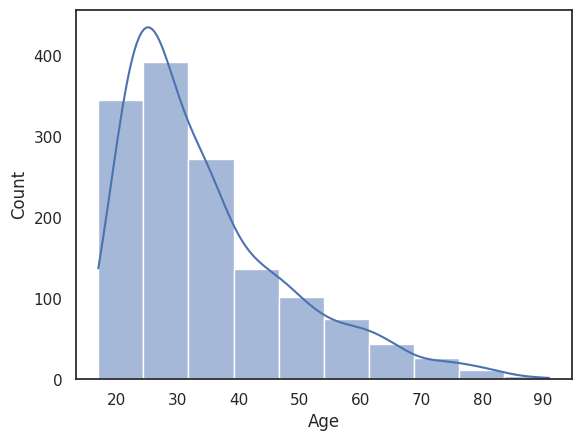

 
total_members


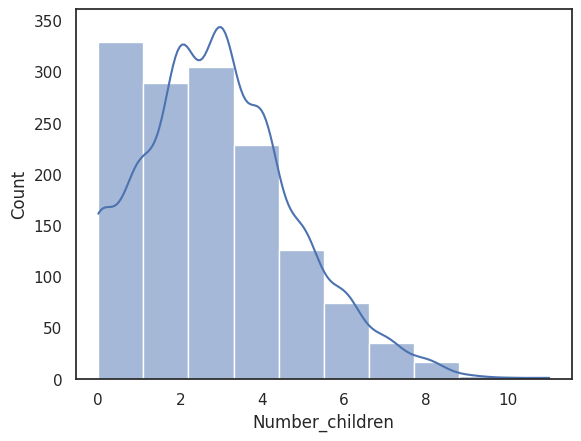

 
total_members


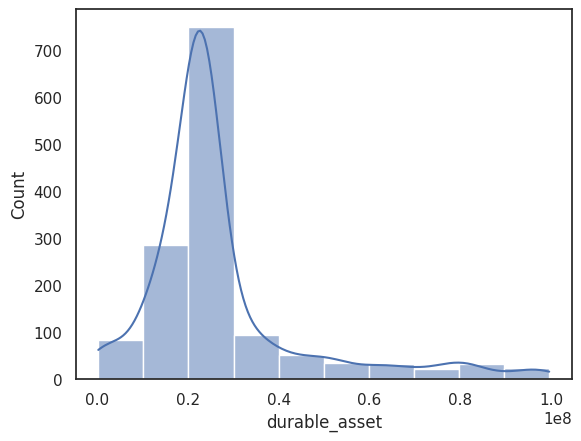

 
total_members


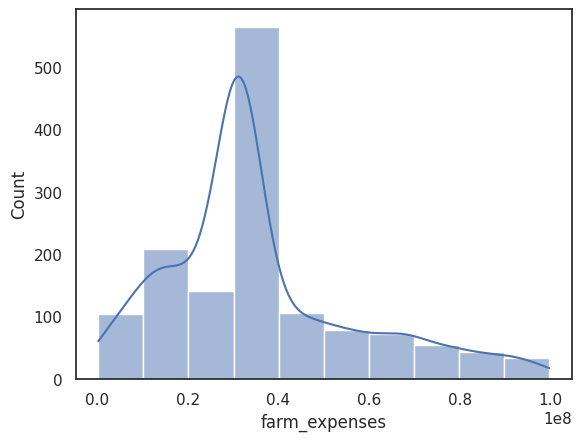

 
total_members


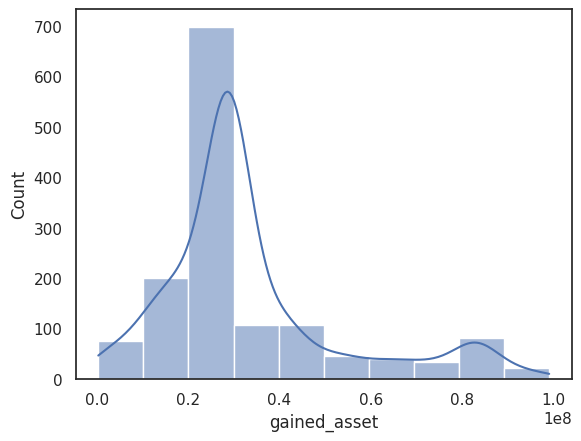

 
total_members


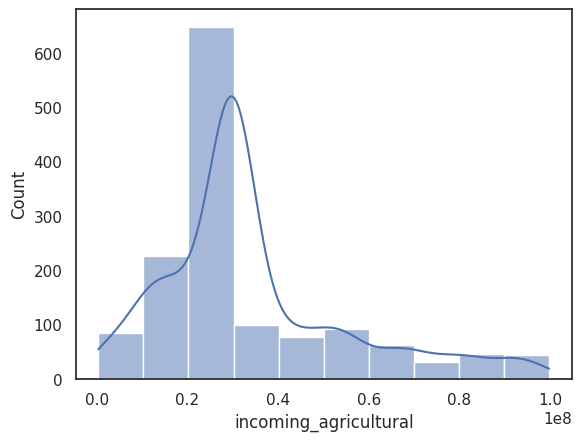

 
total_members


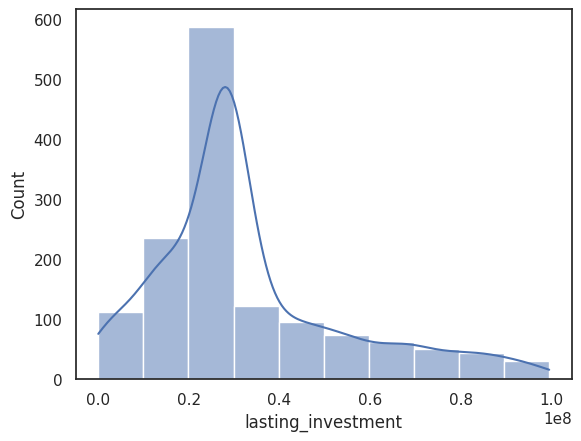

 
total_members


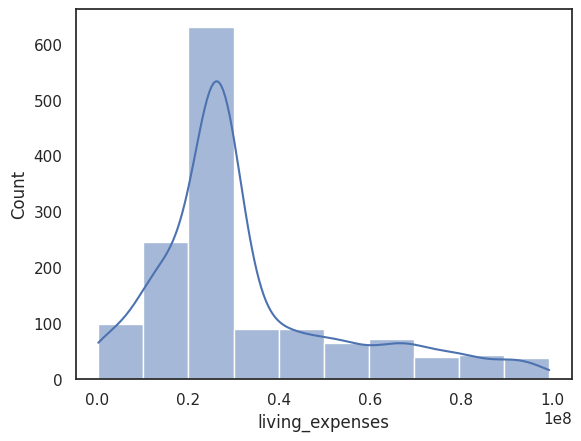

 
total_members


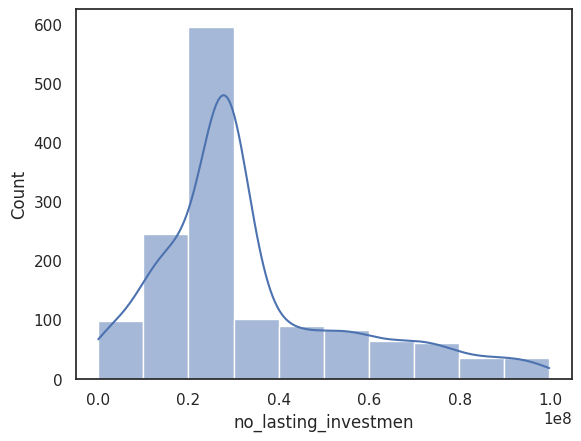

 
total_members


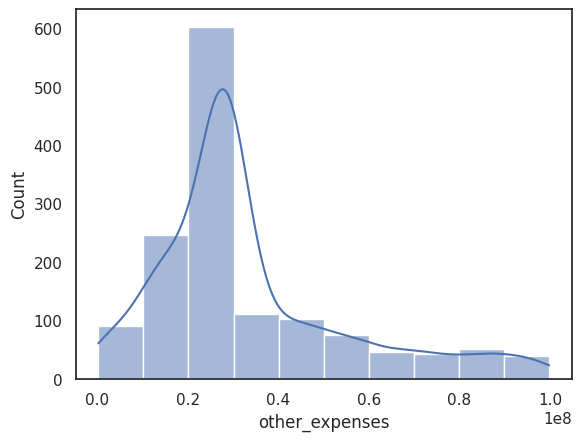

 
total_members


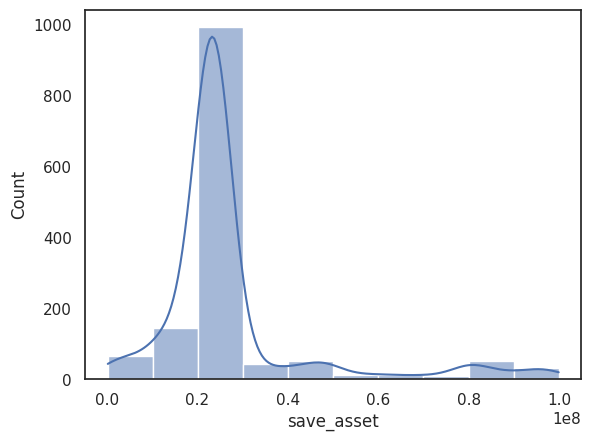

 
total_members


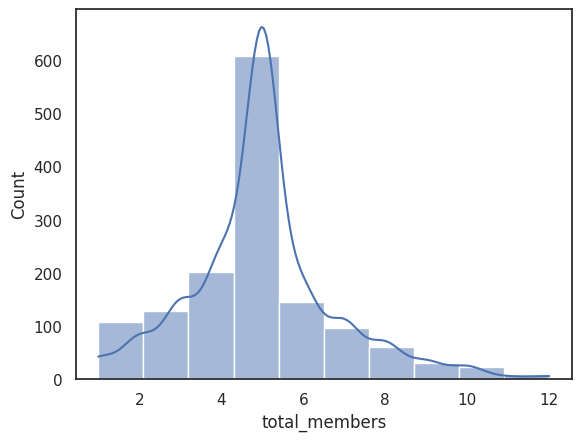

In [ ]:
for column in numerical_vars:
    print(i)
    sns.histplot(data=df, x=column, bins=10, kde=True)
    plt.show()
    print(" ")

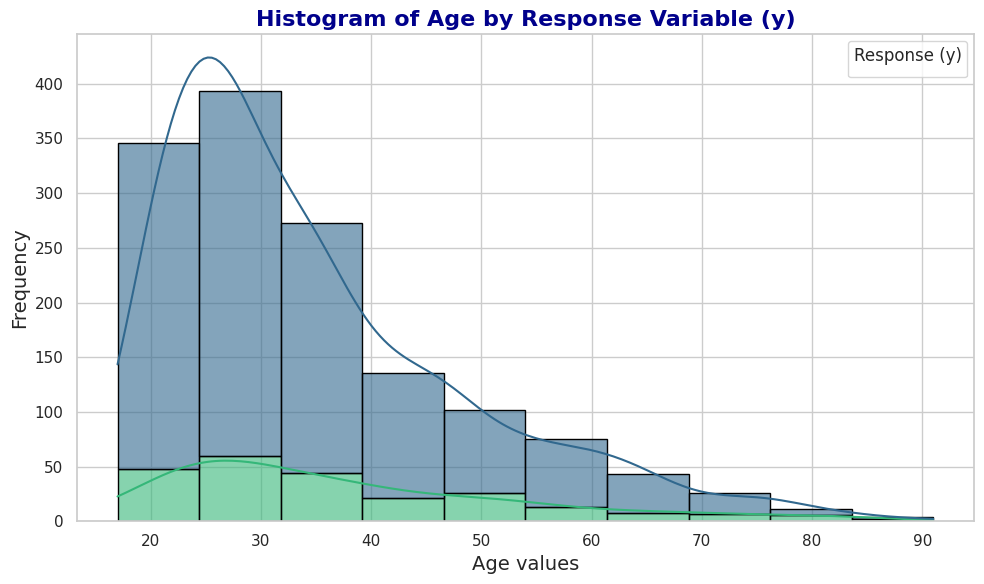

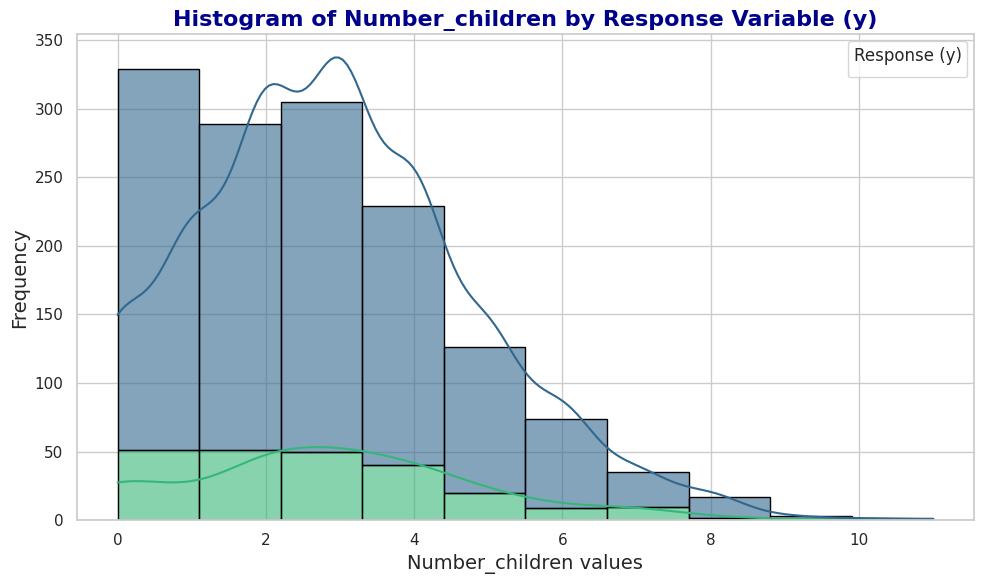

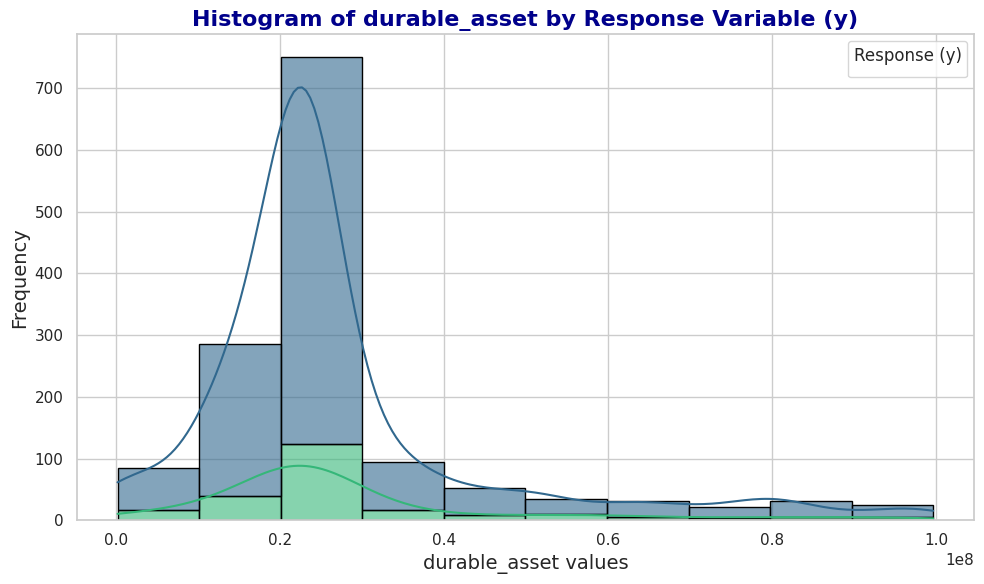

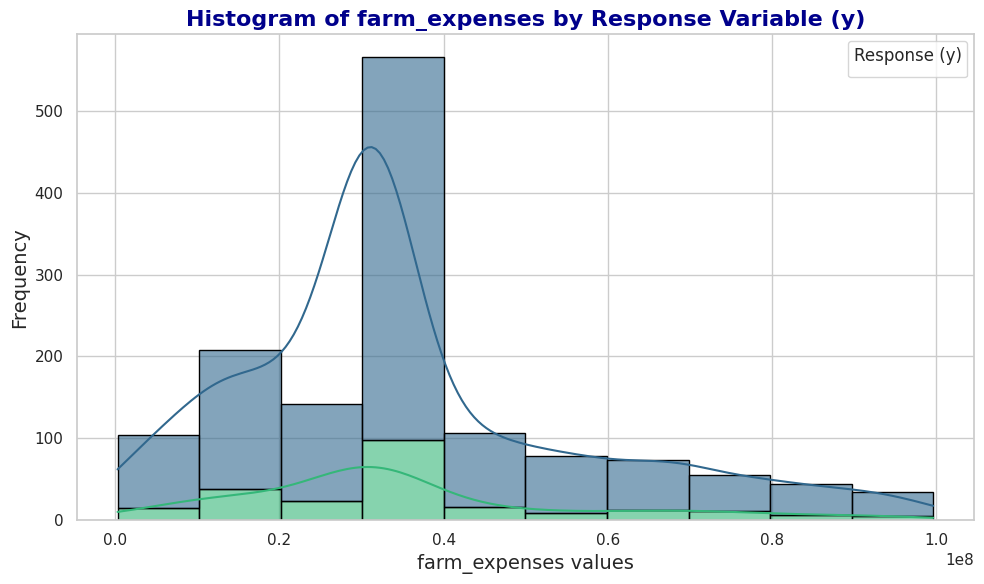

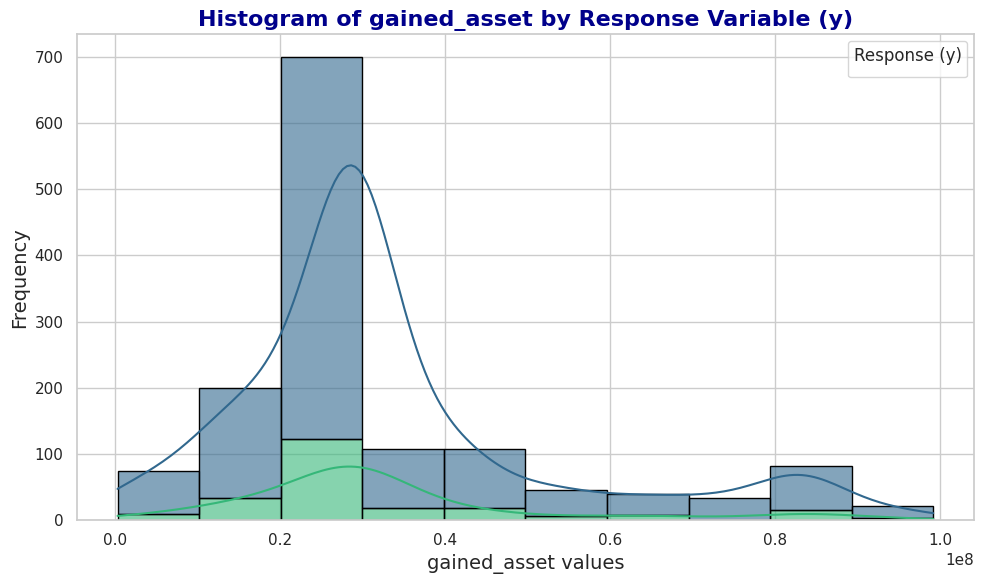

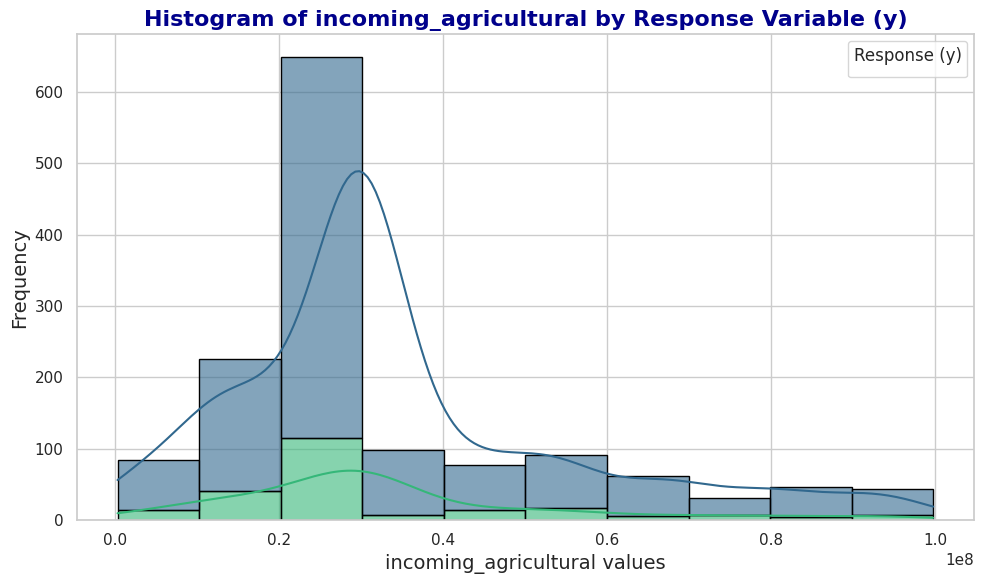

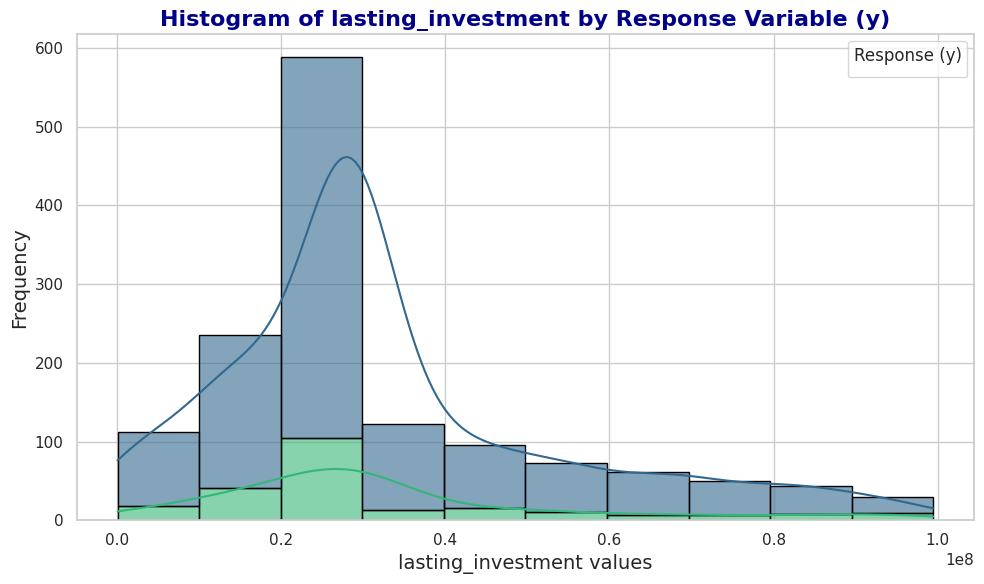

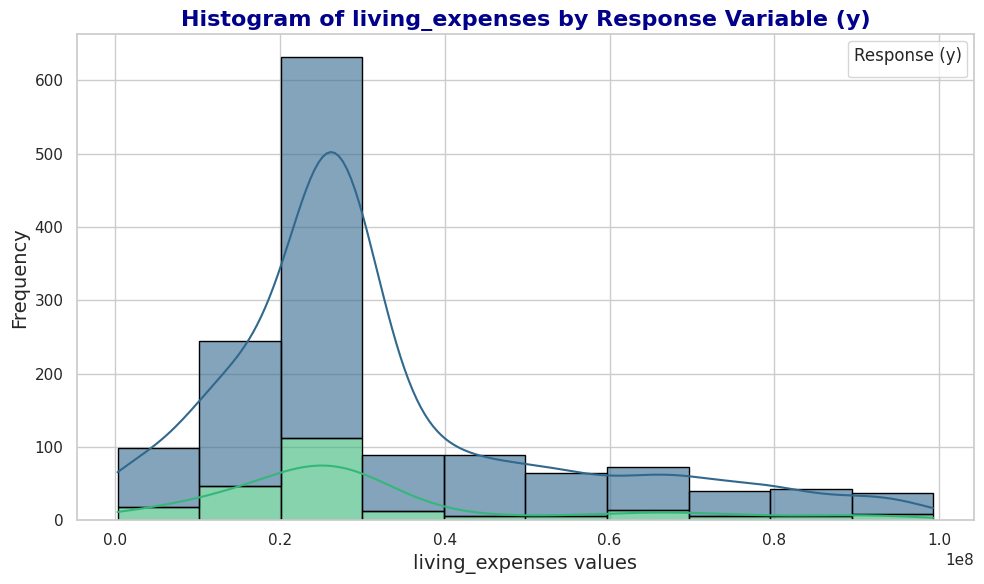

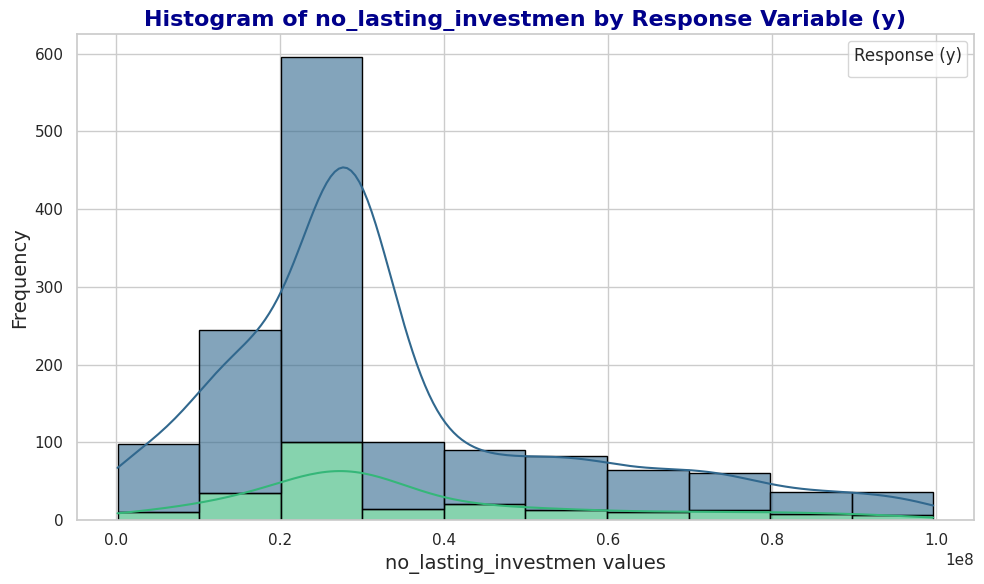

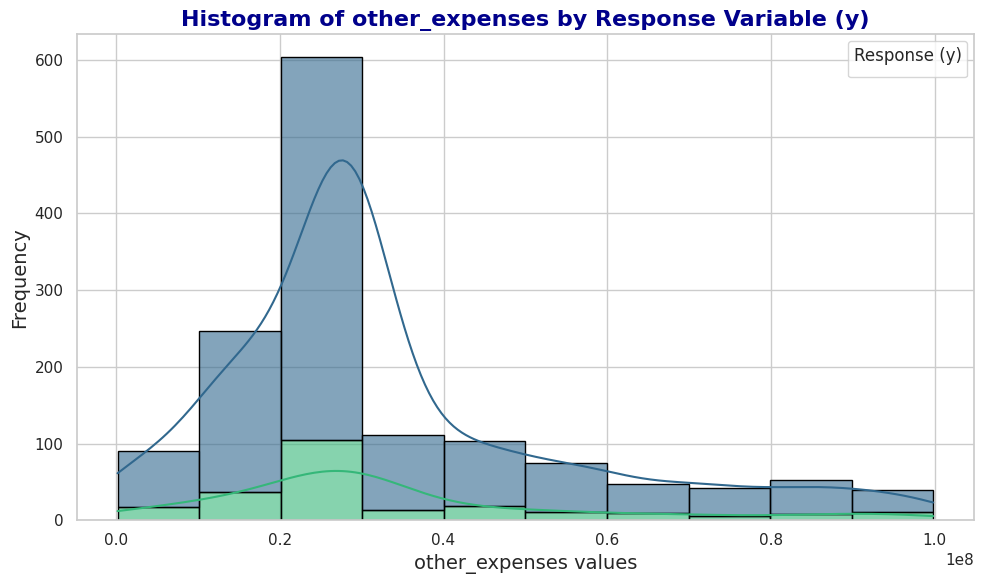

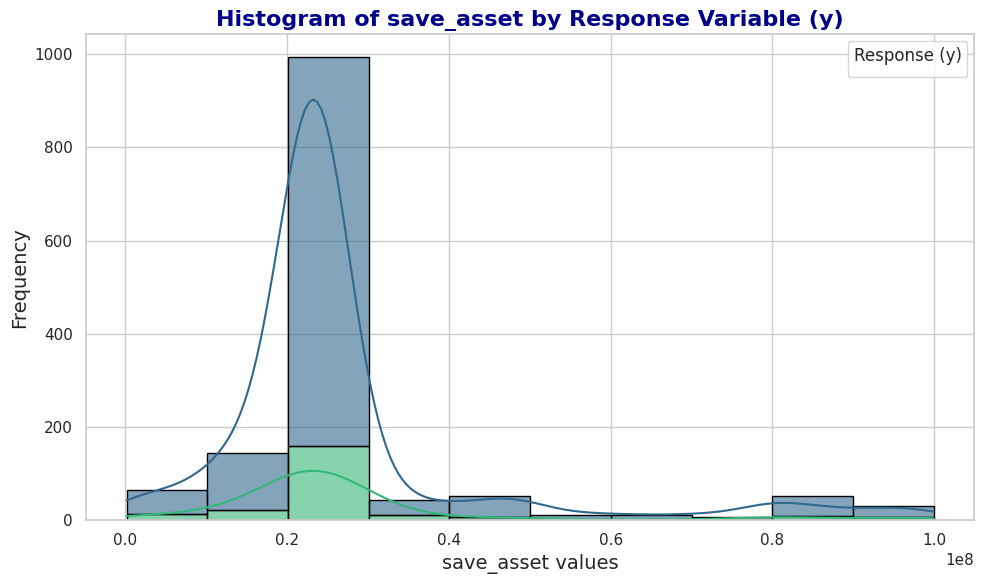

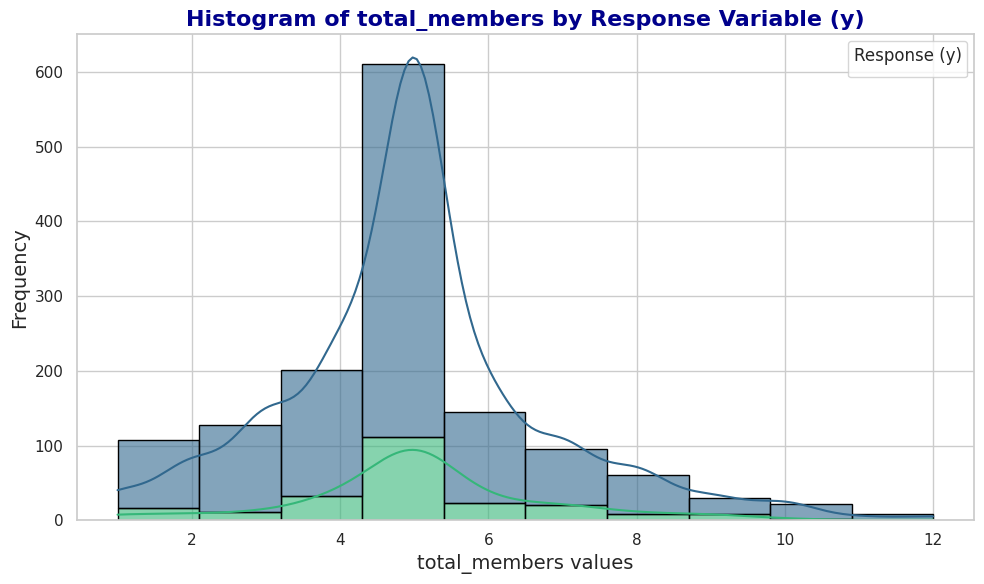

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the general theme and style for plots
sns.set_theme(style="whitegrid")

for column in numerical_vars:
    plt.figure(figsize=(10, 6))  # Set figure size for better readability
    sns.histplot(data=df, x=column, hue=y, bins=10, kde=True, multiple="stack",
                 palette="viridis", alpha=0.6, edgecolor="black")  # Use a color palette and edge colors

    # Set titles and labels with more descriptive text
    plt.title(f'Histogram of {column} by Response Variable (y)', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel(f'{column} values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Customize legend with title and style
    plt.legend(title='Response (y)', title_fontsize=12, fontsize=10, loc='upper right')

    # Show plot with tight layout to reduce extra whitespace
    plt.tight_layout()
    plt.show()
    print("\n")  # Add spacing between plots for clarity


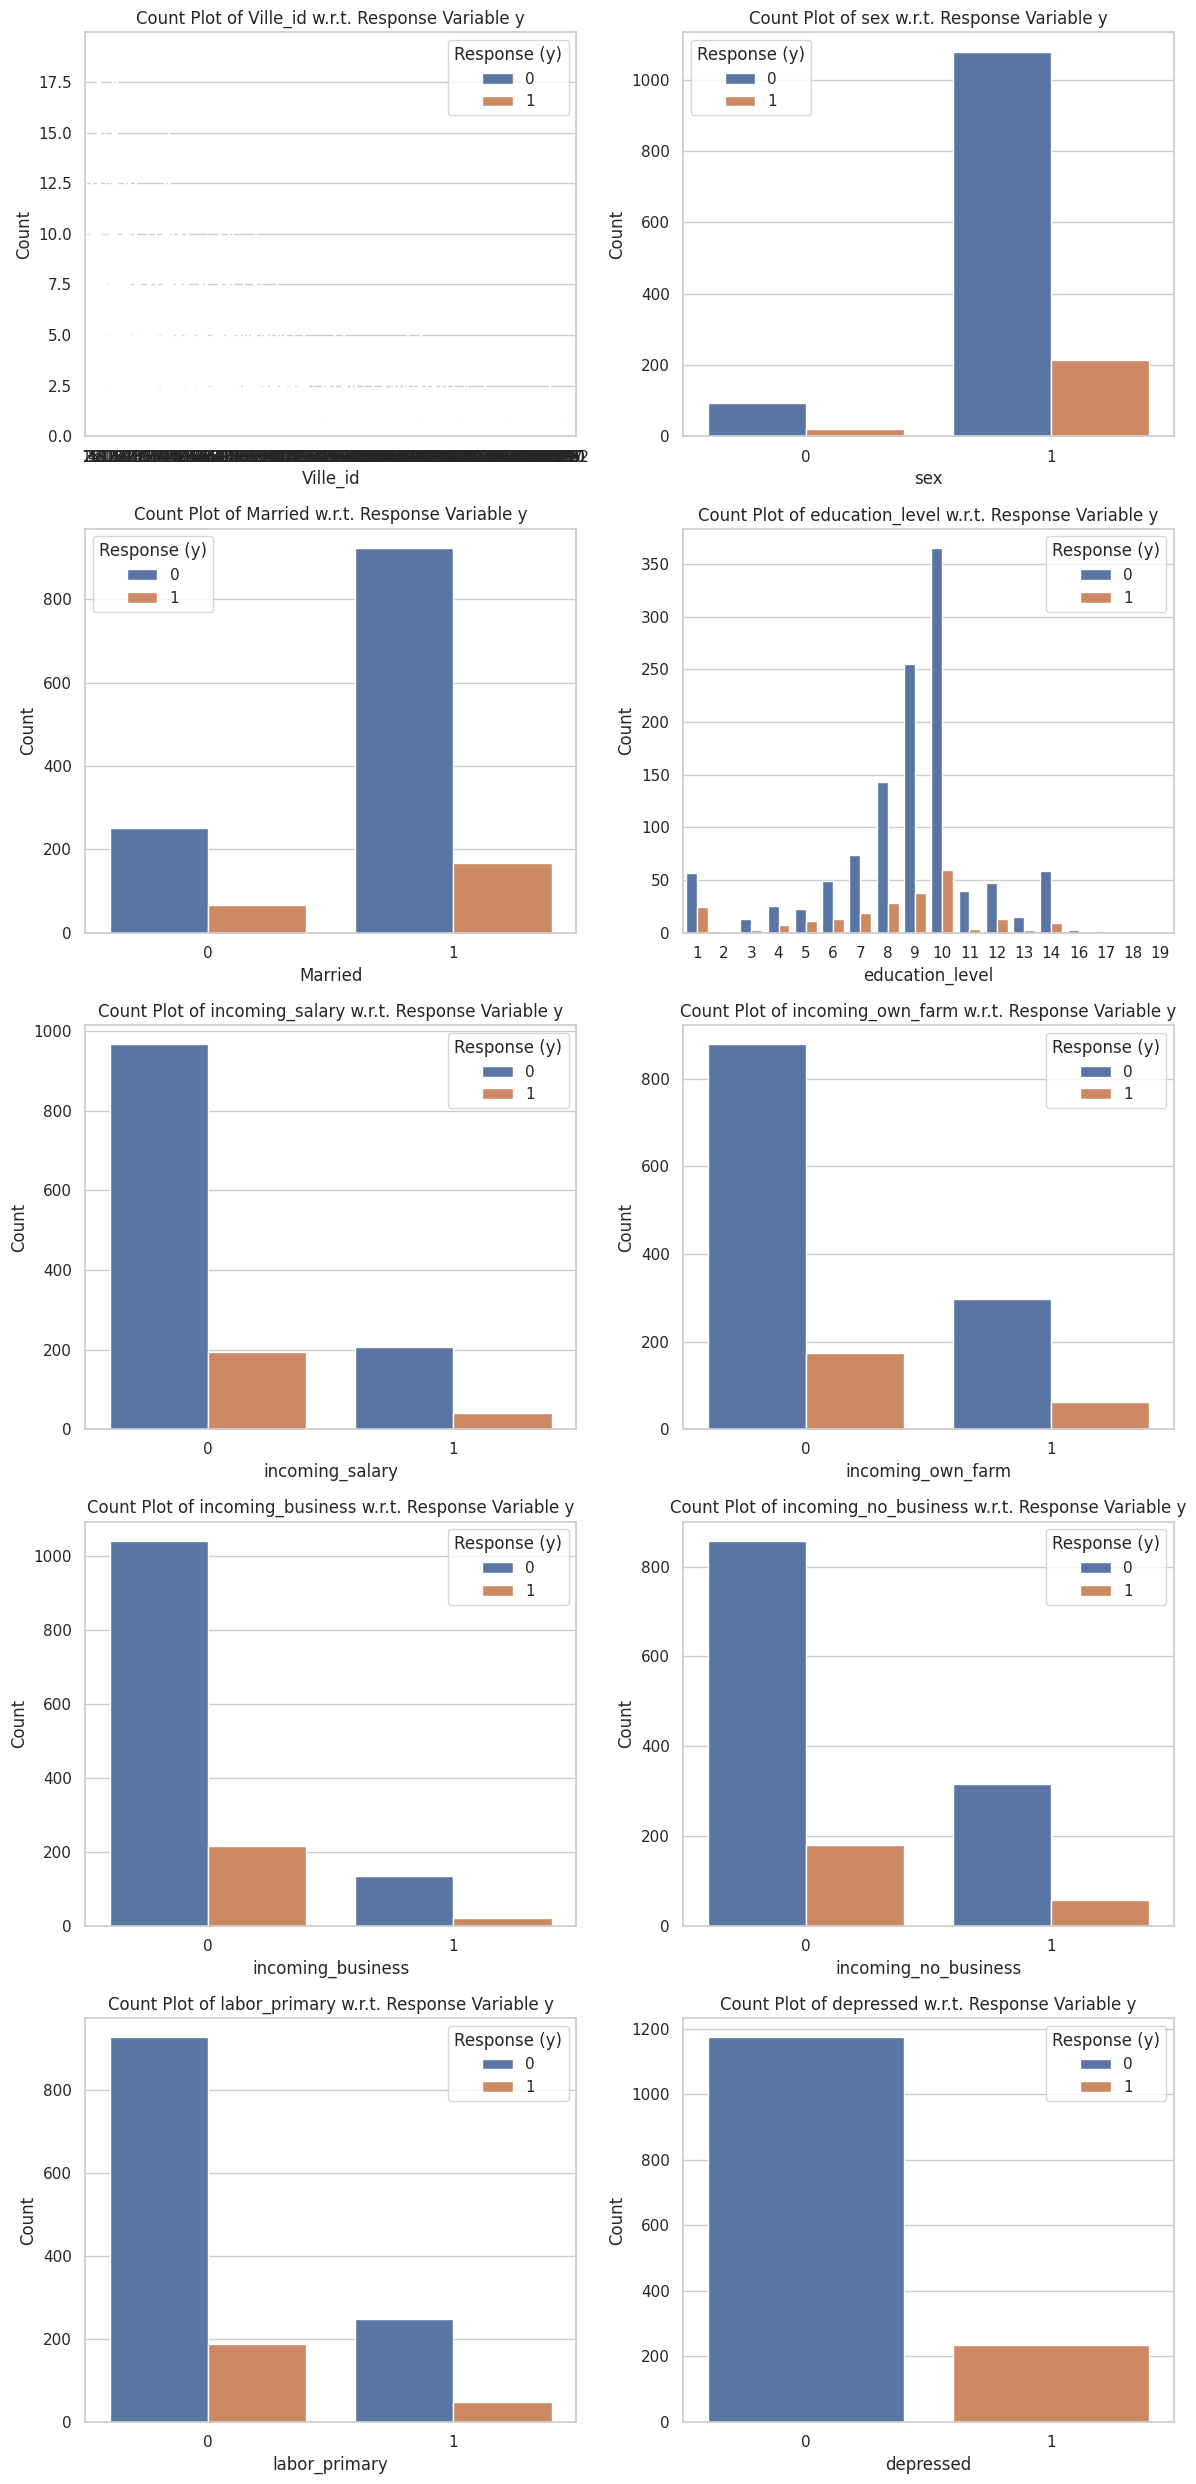

In [ ]:
# Set the number of subplots
num_vars = len(categorical_vars)
num_cols = 2  # Number of columns in the plot grid
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Generate count plots for each categorical variable
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue=y, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {var} w.r.t. Response Variable y')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Response (y)')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

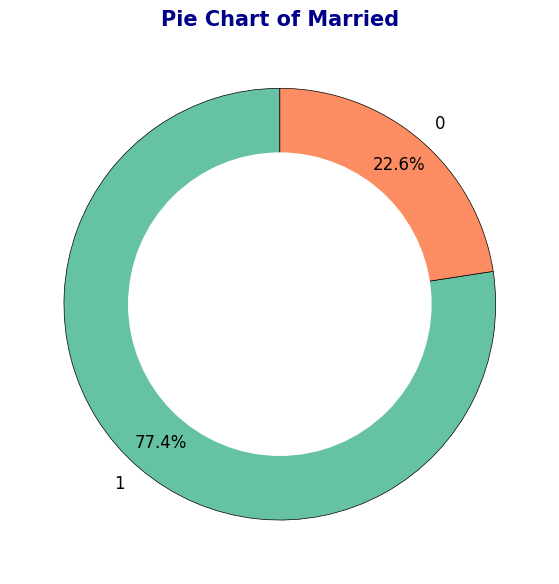

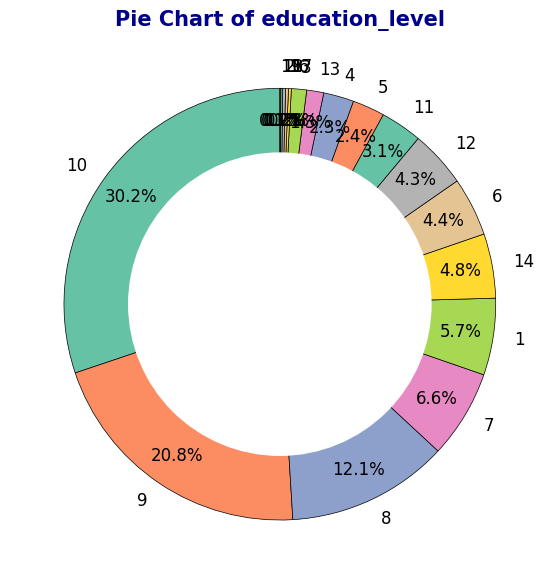

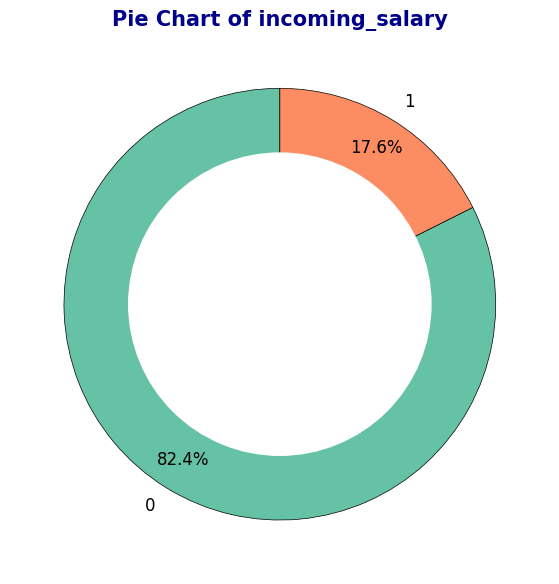

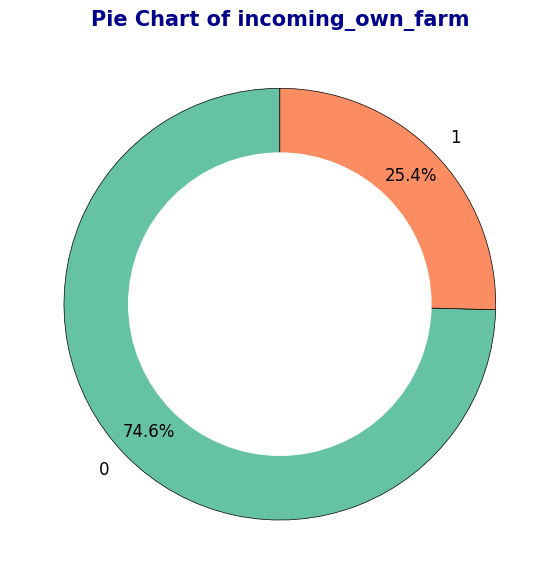

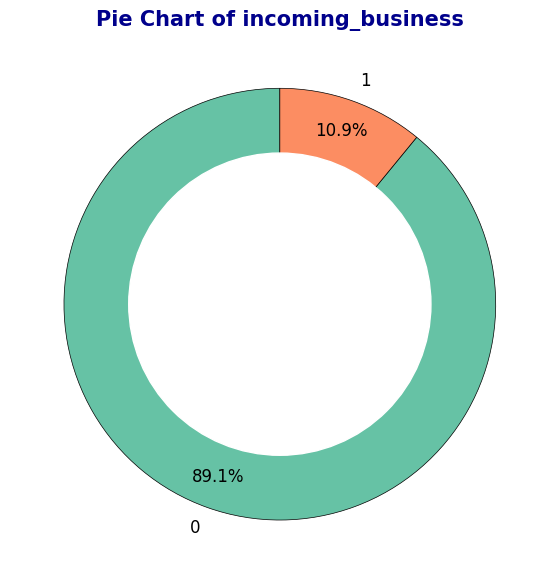

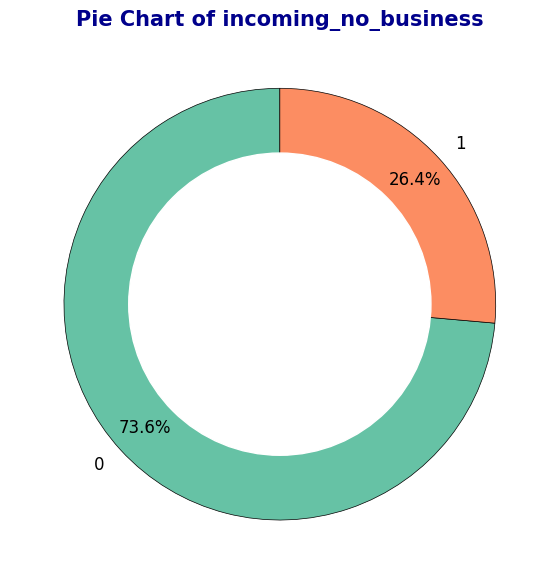

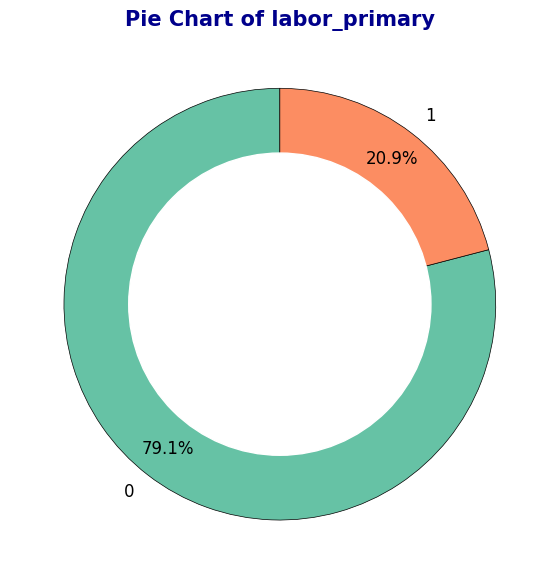

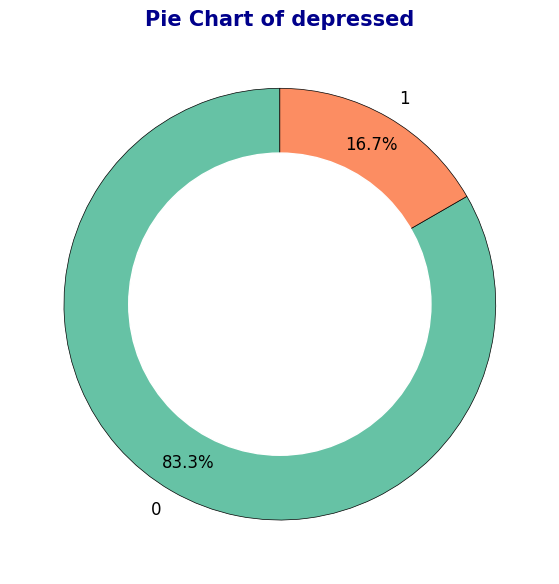

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set general style for aesthetics
sns.set_theme(style="white")
categorical_vars=[ 'Married', 'education_level',
                    'incoming_salary', 'incoming_own_farm', 'incoming_business',
                    'incoming_no_business', 'labor_primary', 'depressed']
# Create pie charts for each categorical variable
for var in categorical_vars:
    # Set figure size for clarity and consistency
    plt.figure(figsize=(7, 6))

    # Plot pie chart with enhanced colors and formatting
    df[var].value_counts().plot.pie(
        autopct='%1.1f%%',  # Show percentages with 1 decimal place
        startangle=90,  # Start angle for a cleaner layout
        colors=sns.color_palette("Set2"),  # Use a harmonious color palette
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},  # Add border to slices
        textprops={'fontsize': 12, 'color': 'black'},  # Adjust font size and color for labels
        pctdistance=0.85  # Position percentage labels closer to the center
    )

    # Customize title with bold styling and center alignment
    plt.title(f'Pie Chart of {var}', fontsize=15, fontweight='bold', color='darkblue')
    plt.ylabel('')  # Remove the y-label for a cleaner look

    # Add a white circle at the center for a donut-style effect
    center_circle = plt.Circle((0, 0), 0.70, color='white')
    plt.gca().add_artist(center_circle)

    # Display the chart with tight layout
    plt.tight_layout()
    plt.show()
    print("\n")  # Add spacing between charts for readability


In [ ]:
class_counts = y.value_counts()
class_counts

,count
depressed,
0,1174
1,235


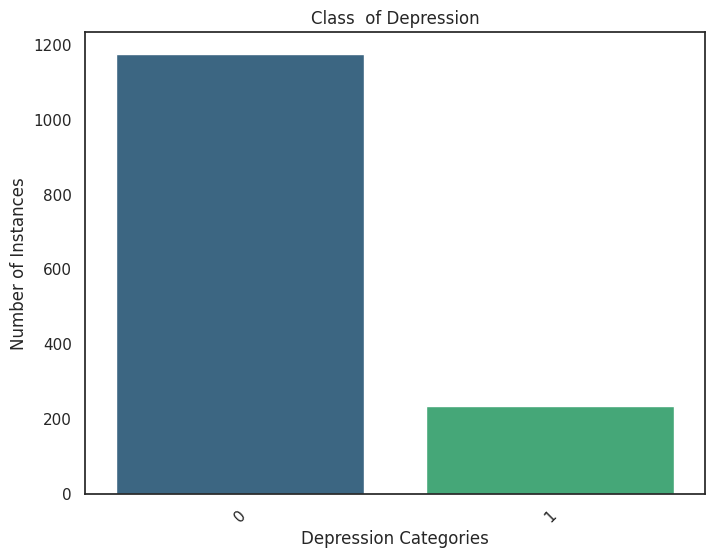

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class  of Depression')
plt.xlabel('Depression Categories')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

## Checking the significance of Numerical variables using Kruskal Wallis

In [51]:
import pandas as pd
from scipy.stats import kruskal

# Initialize an empty list to hold significant variables
significant_num = []

# Loop through each numeric variable and perform the Kruskal-Wallis test
for var in numerical_vars:
    grouped = [X_train[var][y == group] for group in sorted(y.unique())]
    stat, p_value = kruskal(*grouped)

    print(f"Variable: {var}")
    print(f"Kruskal-Wallis test statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check significance (using alpha = 0.05)
    if p_value < 0.05:
        print(f"{var} is significantly associated with the ordinal response.\n")
        significant_num.append(var)  # Add to significant_num list
    else:
        print(f"{var} is not significantly associated with the ordinal response.\n")

# Display the significant variables
print("Significant numeric variables:", significant_num)

Variable: Age
Kruskal-Wallis test statistic: 7.454792657933227
P-value: 0.006326776608032154
Age is significantly associated with the ordinal response.

Variable: Number_children
Kruskal-Wallis test statistic: 0.010736358578146246
P-value: 0.9174737715251342
Number_children is not significantly associated with the ordinal response.

Variable: durable_asset
Kruskal-Wallis test statistic: 0.4138886824805146
P-value: 0.5200023334587127
durable_asset is not significantly associated with the ordinal response.

Variable: farm_expenses
Kruskal-Wallis test statistic: 0.6910079871954313
P-value: 0.40582173840002345
farm_expenses is not significantly associated with the ordinal response.

Variable: gained_asset
Kruskal-Wallis test statistic: 0.0014174766075860685
P-value: 0.9699672278621221
gained_asset is not significantly associated with the ordinal response.

Variable: incoming_agricultural
Kruskal-Wallis test statistic: 0.42393713576777486
P-value: 0.5149789992138758
incoming_agricultural is

In [52]:
top_associations

,Variable,Depression Status,Cramér's V


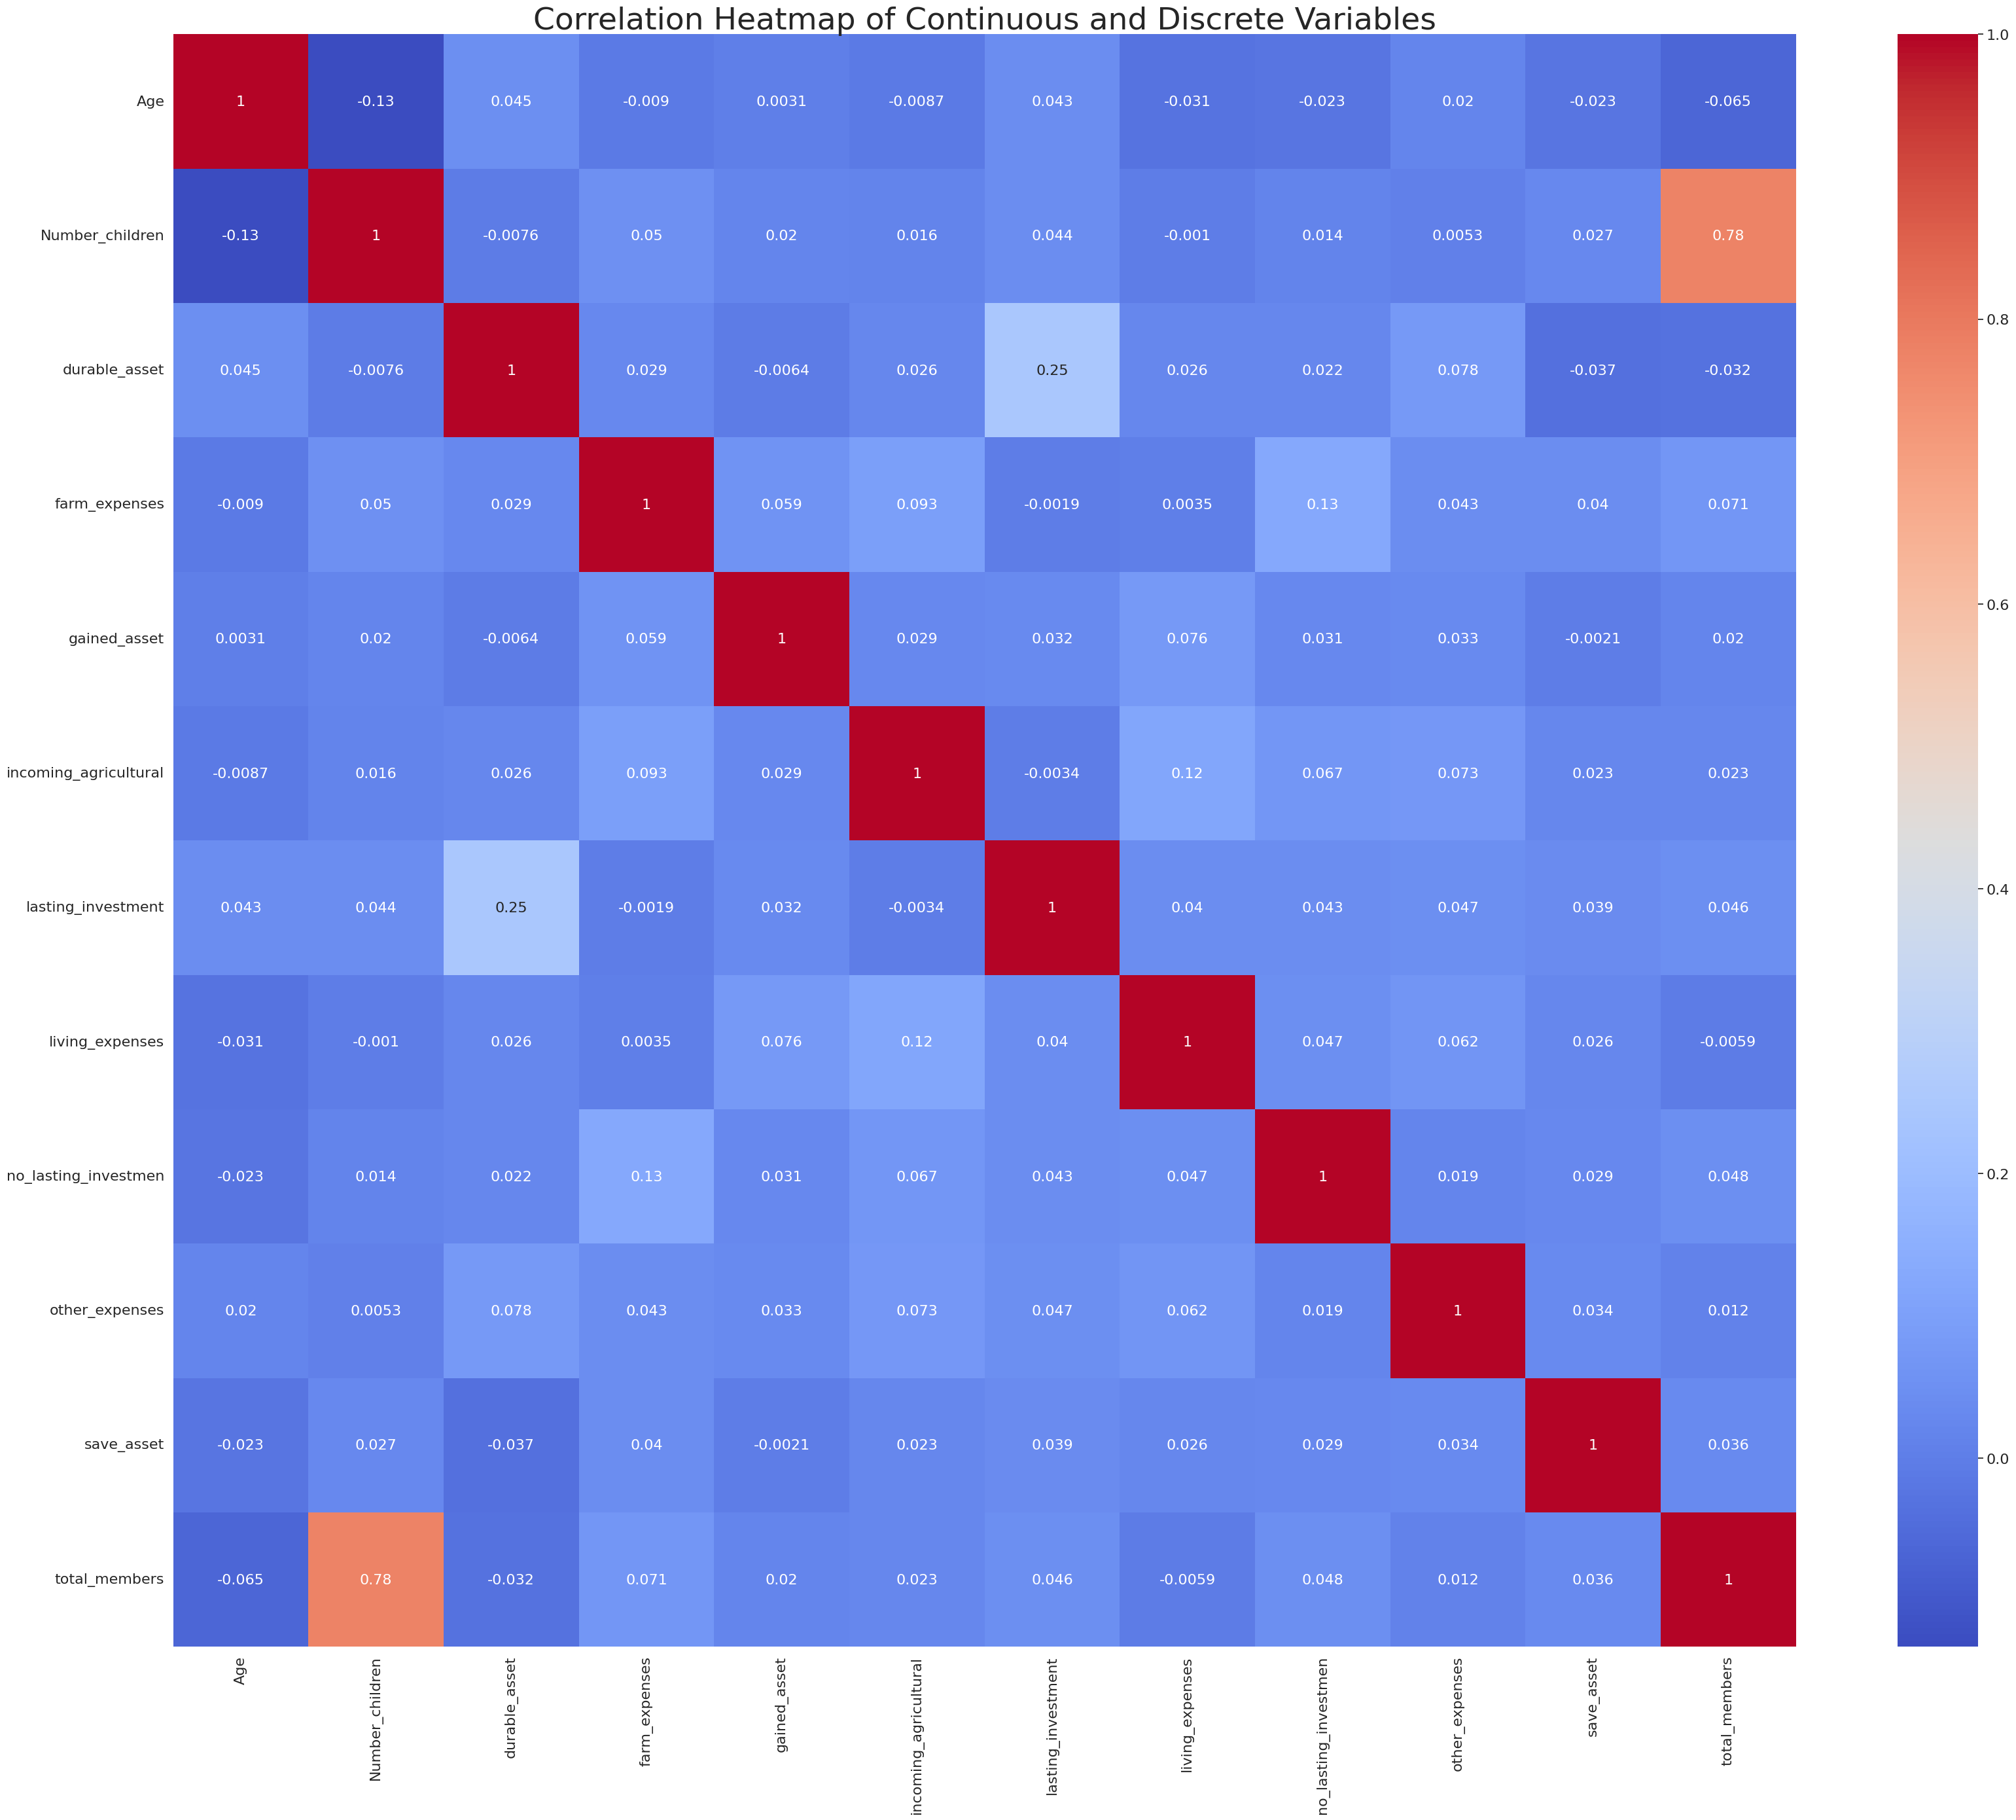

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the context to increase font size
sns.set_context("notebook", rc={"font.size": 30, "axes.titlesize": 34, "axes.labelsize": 30,
                                  "xtick.labelsize": 16, "ytick.labelsize": 16})

# Combine the numerical and discrete variables into one list
combined_vars = numerical_vars
# Subset the DataFrame to include only the combined variables
subset_train = df[combined_vars]

# Calculate the correlation matrix for the subset of continuous and discrete variables
correlation_matrix = subset_train.corr()

# Create the heatmap with a specified color map
plt.figure(figsize=(40, 32))
sns.heatmap(correlation_matrix, fmt='.2g', annot=True, annot_kws={"size": 16}, cmap='coolwarm')  # Change 'coolwarm' to your preferred colormap
plt.title('Correlation Heatmap of Continuous and Discrete Variables')
plt.show()


During the analysis, it was observed that Number of Children and Total Members showed a high correlation of 0.78. Since both variables provide similar information—Number of Children being a subset of Total Members (the total family members living in the respondent's household)—retaining both variables could introduce redundancy into the model. Therefore, to avoid multicollinearity and reduce dimensionality, Number of Children was dropped, while Total Members was retained to represent the family structure in the model.

In [ ]:
df.drop("Number_children",axis=1,inplace=True)

In [28]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan  # Return NaN for invalid tables
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))


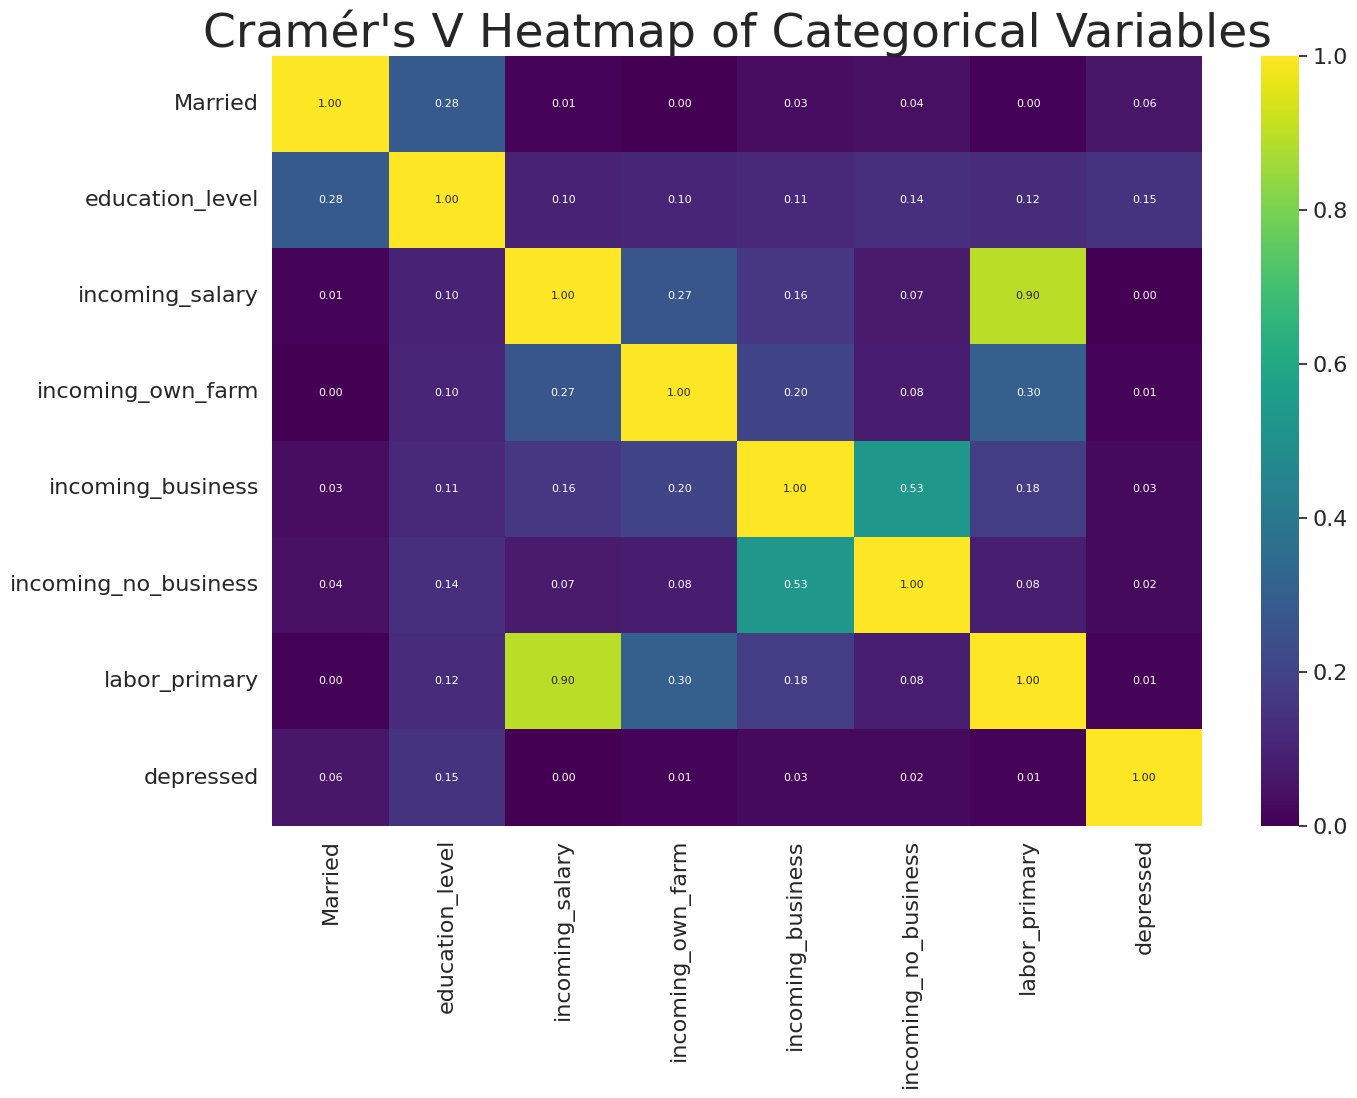

In [ ]:
# Create a Cramér's V matrix
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        cramers_v_matrix.loc[var1, var2] = cramers_v(data[var1], data[var2])

# Replace NaN values with 0
cramers_v_matrix.fillna(0, inplace=True)

# Convert the Cramér's V matrix to float type
cramers_v_matrix = cramers_v_matrix.astype(float)

# Create a heatmap to visualize Cramér's V matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cramers_v_matrix, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f',
            annot_kws={"size": 8})  # Adjust the size here
plt.title("Cramér's V Heatmap of Categorical Variables")
plt.show()


Incoming Salary and Labor Primary exhibit a high correlation (0.9), indicating redundancy between these variables. Given that their individual contributions to predicting Depression Status were low, retaining both could introduce multicollinearity without adding significant predictive value.

To enhance model interpretability and avoid redundancy, Labor Primary was retained as it provides additional context about the relationship between the respondent's income source and primary labor. Incoming Salary was therefore excluded, as its information is sufficiently represented by Labor Primary.

In [ ]:
df.drop("incoming_salary",axis=1,inplace=True)

In [ ]:
# Create a list to store variable pairs and their Cramér's V values
cramers_v_values = []

# Loop through the Cramér's V matrix to find pairs and their values
for i in range(len(categorical_vars)):
    for j in range(len(categorical_vars)):
        if i != j:  # Avoid comparing the same variable
            cramers_v_values.append((categorical_vars[i], categorical_vars[j], cramers_v_matrix.iloc[i, j]))

# Convert the list to a DataFrame
cramers_v_df = pd.DataFrame(cramers_v_values, columns=['Variable 1', 'Variable 2', 'Cramér\'s V'])

# Sort the DataFrame by Cramér's V values in descending order
top_associations = cramers_v_df.sort_values(by='Cramér\'s V', ascending=False).head(10)

# Print the top 10 associated categorical variables
print(top_associations)


              Variable 1            Variable 2  Cramér's V
19       incoming_salary         labor_primary    0.895844
44         labor_primary       incoming_salary    0.895844
39  incoming_no_business     incoming_business    0.530684
32     incoming_business  incoming_no_business    0.530684
26     incoming_own_farm         labor_primary    0.298333
45         labor_primary     incoming_own_farm    0.298333
7        education_level               Married    0.277837
0                Married       education_level    0.277837
23     incoming_own_farm       incoming_salary    0.267602
16       incoming_salary     incoming_own_farm    0.267602


In [ ]:
for i in  X.columns:
    print(i)
    a=X[i].value_counts()
    print(a)
    print()

Ville_id
Ville_id
15     24
17     21
23     20
7      20
8      19
       ..
123     1
278     1
255     1
229     1
291     1
Name: count, Length: 255, dtype: int64

sex
sex
1    1294
0     115
Name: count, dtype: int64

Age
Age
25    76
23    71
22    67
26    67
27    64
      ..
87     1
91     1
85     1
74     1
70     1
Name: count, Length: 69, dtype: int64

Married
Married
1    1091
0     318
Name: count, dtype: int64

Number_children
Number_children
3     305
2     289
4     229
1     181
0     148
5     126
6      74
7      35
8      17
9       3
10      1
11      1
Name: count, dtype: int64

education_level
education_level
10    425
9     293
8     171
7      93
1      81
14     68
6      62
12     60
11     44
5      34
4      32
13     18
3      16
17      3
16      3
2       3
18      2
19      1
Name: count, dtype: int64

total_members
total_members
5     610
4     201
6     145
3     128
7      96
2      71
8      61
1      36
9      30
10     22
12      5
11      4
Na

In [ ]:
pip install pandas matplotlib wordcloud


In [ ]:
df.columns

Index(['Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [ ]:
# Convert 'village_id' column to categorical
df['Ville_id'] = df['Ville_id'].astype('category')

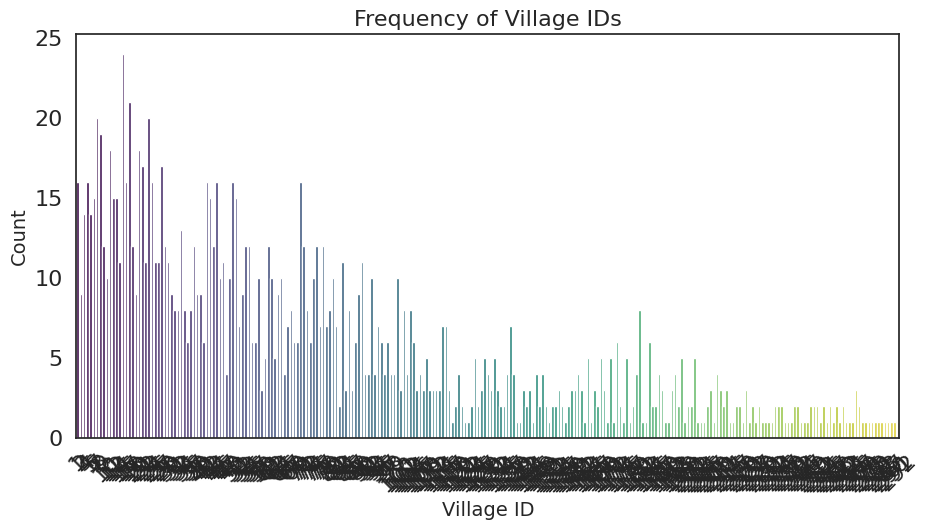

In [ ]:
# Convert 'village_id' column to categorical (optional, but recommended for clarity)
df['Ville_id'] = df['Ville_id'].astype('category')

# Count the frequency of each village_id
village_counts = df['Ville_id'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=village_counts.index, y=village_counts.values, palette='viridis')
plt.title('Frequency of Village IDs', fontsize=16)
plt.xlabel('Village ID', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [ ]:
!pip install wordcloud matplotlib


In [ ]:
df['Ville_id'] = df['Ville_id'].astype(str)
df.dtypes

,0
Ville_id,object
sex,int64
Age,int64
Married,int64
education_level,int64
total_members,int64
gained_asset,int64
durable_asset,int64
save_asset,int64
living_expenses,int64


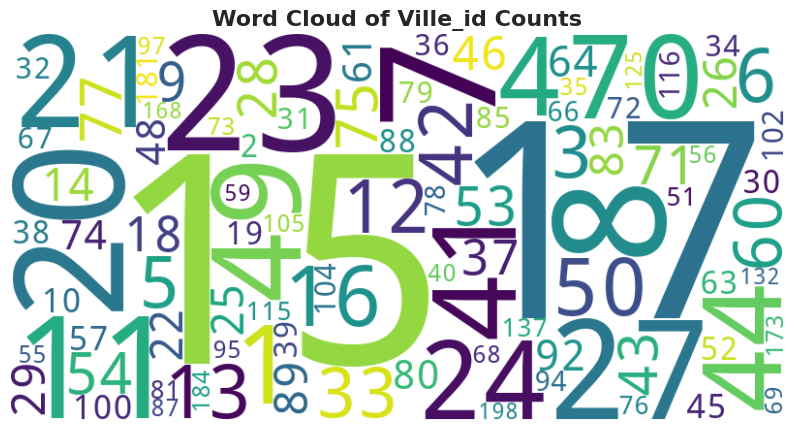

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the Ville_id counts to a dictionary for word cloud input
ville_counts = df['Ville_id'].value_counts().to_dict()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=100).generate_from_frequencies(ville_counts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Word Cloud of Ville_id Counts', fontsize=16, fontweight='bold')
plt.show()


In [ ]:
df

,Ville_id,sex,Age,Married,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,91,1,28,1,10,5,28912201,22861940,23399979,26692283,28203066,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,57,1,23,1,8,5,28912201,22861940,23399979,26692283,28203066,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,115,1,22,1,9,5,28912201,22861940,23399979,26692283,28203066,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,97,1,27,1,10,4,52667108,19698904,49647648,397715,44042267,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,42,0,59,0,10,6,82606287,17352654,23399979,80877619,74503502,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,22,1,25,1,7,5,28912201,22861940,23399979,26692283,28203066,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1405,69,1,28,1,10,6,15711078,24023054,15506558,10476722,71588707,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1406,184,1,66,0,1,1,42440731,22861940,22562605,12545372,56534257,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1407,75,1,51,1,12,5,28912201,22861940,23399979,26692283,28203066,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [ ]:
df.to_csv('Cleaned2.csv', index=False)
